# Machine Learning for Time Series 
See https://medium.com/analytics-vidhya/darts-a-new-approach-simplifying-time-series-analysis-and-forecasting-in-machine-learning-8edcc177ad89

In [2]:
%matplotlib inline
## Importing Libraries
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
)

from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.datasets import AirPassengersDataset

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


<Axes: xlabel='Month'>

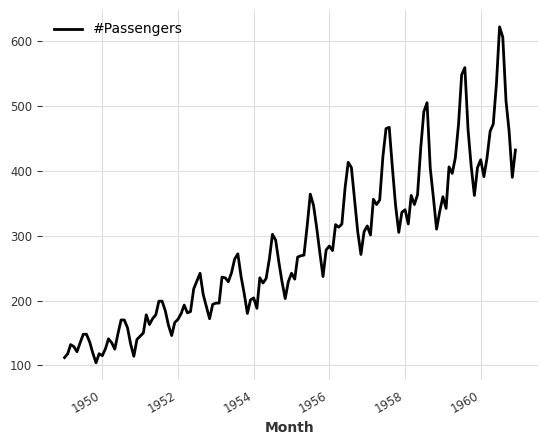

In [3]:
# import data 
series = AirPassengersDataset().load()
series.plot()

In [8]:
type(series)

darts.timeseries.TimeSeries

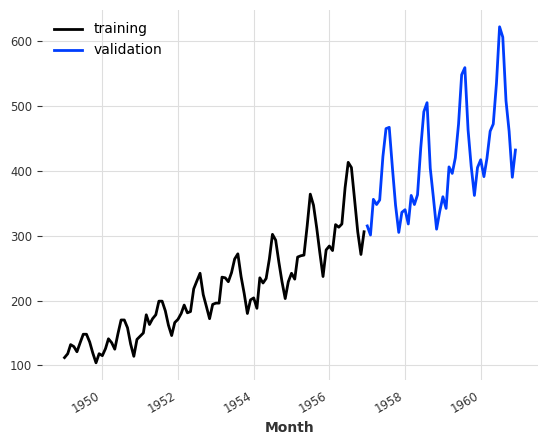

In [4]:
## Split train and test data
train, val = series.split_before(pd.Timestamp('19570101'))
train.plot(label='training')
val.plot(label='validation')
plt.legend()

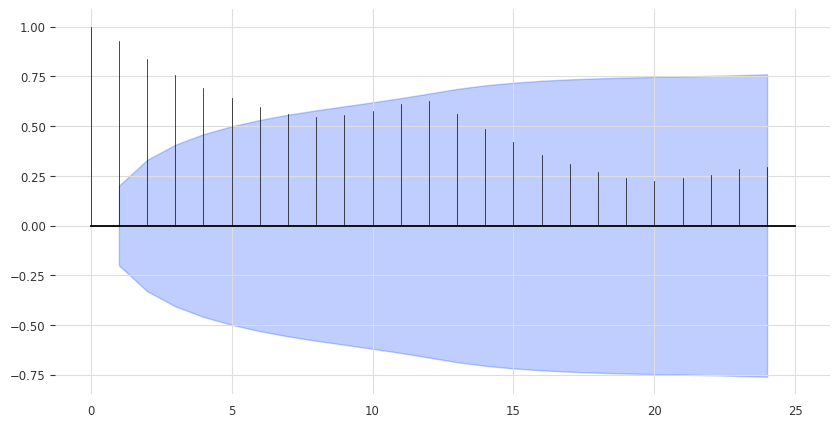

In [5]:
plot_acf(train)
# stationary if curve decreases 

In [12]:
## Fitting multiple models and checking the MAPE
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    return forecast
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))

In [10]:
## use the function
eval_model(ExponentialSmoothing())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 5.03%
model AutoARIMA() obtains MAPE: 18.83%
model Theta() obtains MAPE: 10.22%


In [15]:
model = Theta()  
model.fit(train)
forecast = model.predict(len(val))

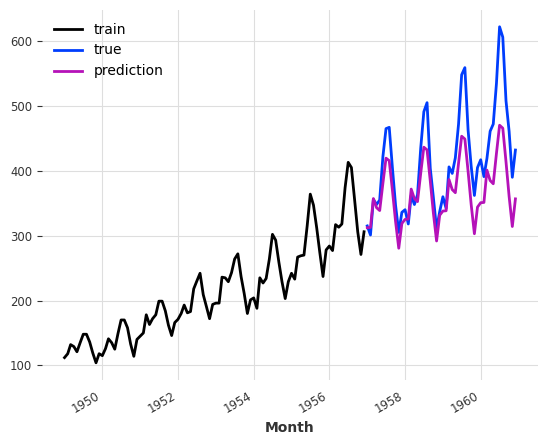

In [16]:
## Visualizing theta foreacsting result

train.plot(label='train')
val.plot(label='true')
forecast.plot(label='prediction')
plt.legend()